C:\Users\Percented\AppData\Local\Temp\ipykernel_39796\2097475131.py:86: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


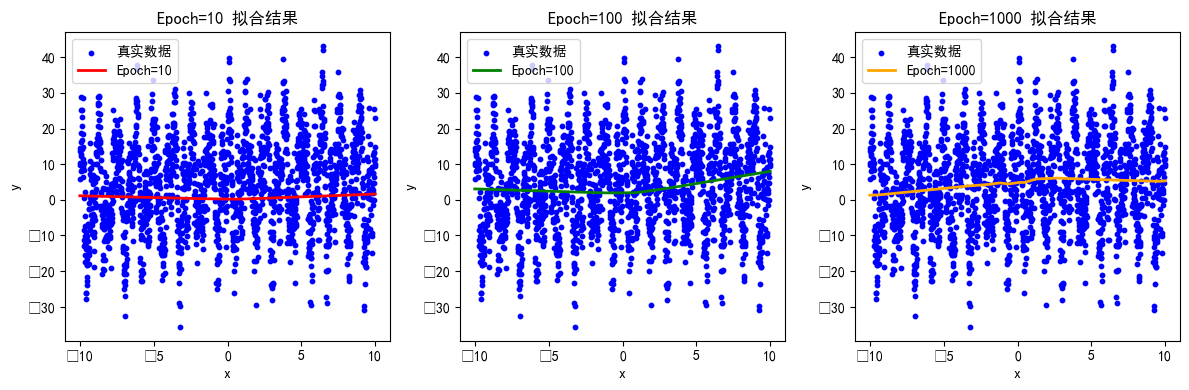

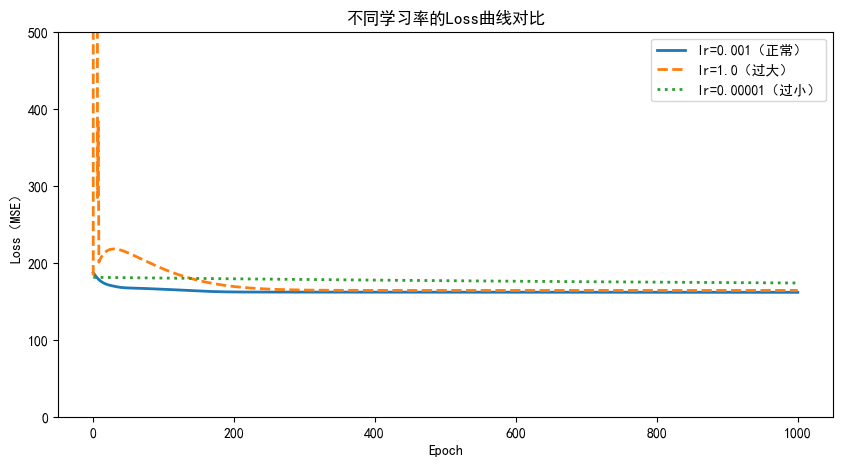

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 读取数据与转化
data = pd.read_csv("task2.csv")
x = data["x"].values.reshape(-1, 1).astype(np.float32)
y = data["y"].values.reshape(-1, 1).astype(np.float32)
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# 2. MLP模型手动搭建 64-32-1
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)
    
# 3. 模型配置
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoches = 1000
history_loss = []
especial_epoch = {10: None, 100: None, 1000: None}

# 4. 模型训练
model.train()
for epoch in range(1, epoches + 1):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()
    history_loss.append(loss.item())
    # 记录特殊epoch的loss 以便后续可视化
    if epoch in especial_epoch:
        especial_epoch[epoch] = y_pred.detach().numpy()

# 5. 可视化对比（真实数据vs不同epoch拟合曲线）
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.figure(figsize=(12, 4))

# 排序x用于绘制连贯曲线
sorted_idx = np.argsort(x.squeeze())
x_sorted = x[sorted_idx]

# 子图1：Epoch=10
plt.subplot(1, 3, 1)
plt.scatter(x, y, color="blue", s=10, label="真实数据")
plt.plot(x_sorted, especial_epoch[10][sorted_idx], color="red", linewidth=2, label="Epoch=10")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Epoch=10 拟合结果")
plt.legend()

# 子图2：Epoch=100
plt.subplot(1, 3, 2)
plt.scatter(x, y, color="blue", s=10, label="真实数据")
plt.plot(x_sorted, especial_epoch[100][sorted_idx], color="green", linewidth=2, label="Epoch=100")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Epoch=100 拟合结果")
plt.legend()

# 子图3：Epoch=1000
plt.subplot(1, 3, 3)
plt.scatter(x, y, color="blue", s=10, label="真实数据")
plt.plot(x_sorted, especial_epoch[1000][sorted_idx], color="orange", linewidth=2, label="Epoch=1000")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Epoch=1000 拟合结果")
plt.legend()

plt.tight_layout()
plt.show()

# 6. 不同学习率下的loss可视化
def train_with_lr(lr, epochs=1000):
    model_lr = MLP()
    optimizer_lr = optim.Adam(model_lr.parameters(), lr=lr)
    loss_history_lr = []
    model_lr.train()
    for epoch in range(epochs):
        optimizer_lr.zero_grad()
        y_pred = model_lr(x_tensor)
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer_lr.step()
        loss_history_lr.append(loss.item())
    return loss_history_lr

# 配置不同的学习率
lr_large = 1.0
lr_small = 0.00001
loss_large = train_with_lr(lr_large)
loss_small = train_with_lr(lr_small)
loss_normal = history_loss

# 绘制loss曲线对比
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), loss_normal, label="lr=0.001（正常）", linewidth=2)
plt.plot(range(1, 1001), loss_large, label="lr=1.0（过大）", linewidth=2, linestyle="--")
plt.plot(range(1, 1001), loss_small, label="lr=0.00001（过小）", linewidth=2, linestyle=":")
plt.xlabel("Epoch")
plt.ylabel("Loss（MSE）")
plt.title("不同学习率的Loss曲线对比")
plt.legend()
plt.ylim(0, 500)  # 限制y轴范围，便于观察
plt.show()  